In [38]:
"""  

    importing all the module and submodules used in
    this file.

"""

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings

# Ignore all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
""" 
    loading data from csv file to pandas dataframe

"""

df = pd.read_csv('data/dataset.csv')
print(f"Mathematical operation value of each numerical column\n  {df.describe()}")

Mathematical operation value of each numerical column
         SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [15]:
list_of_columns = df.columns
print(list_of_columns)
print(df['Contract'].value_counts())
print(df['PaymentMethod'].value_counts())
print(df['InternetService'].value_counts())
df.head(4)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [16]:
""" 
    encoding all the columns into numerical form
    if it has two category it will incoded in 0 and 1
    otherwise according to number of categories

"""


labelencoder= LabelEncoder()
y = labelencoder.fit_transform(df['gender'])
df['Churn'] = labelencoder.fit_transform(df['Churn'])
df['gender'] = labelencoder.fit_transform(df['gender'])
df['Dependents'] = labelencoder.fit_transform(df['Dependents'])
df['PhoneService'] = labelencoder.fit_transform(df['PhoneService'])
df['TechSupport'] = labelencoder.fit_transform(df['TechSupport'])
df['Partner'] = labelencoder.fit_transform(df['Partner'])
df['Contract'] = labelencoder.fit_transform(df['Contract'])
df['OnlineSecurity'] = labelencoder.fit_transform(df['OnlineSecurity'])
df['PaperlessBilling'] = labelencoder.fit_transform(df['PaperlessBilling'])
df['SeniorCitizen'] = labelencoder.fit_transform(df['SeniorCitizen'])
df['StreamingMovies'] = labelencoder.fit_transform(df['StreamingMovies'])
df['DeviceProtection'] = labelencoder.fit_transform(df['DeviceProtection'])
df['InternetService'] = labelencoder.fit_transform(df['InternetService'])
df['PaymentMethod'] = labelencoder.fit_transform(df['PaymentMethod'])
df['MultipleLines'] = labelencoder.fit_transform(df['MultipleLines'])
df['OnlineBackup'] = labelencoder.fit_transform(df['OnlineBackup'])


"""  

    figure out which column is necessary and contributing for predicting churn.
    we can ignore StreamingMovies, StreamingTV, gender

"""
df = df.drop(columns=['gender','StreamingTV','StreamingMovies','PhoneService','InternetService','DeviceProtection','OnlineBackup','customerID'])

""" 
    transforming total charges into float64 base from string or object 

"""

def transformation(text):
    if text == ' ':
        return 0
    else:
        return float(text)
df['TotalCharges'] = df['TotalCharges'].apply(transformation)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)


In [17]:
df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,0,2,0,0,1,3,53.85,108.15,1
3,0,0,0,45,1,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,1,2,70.70,151.65,1


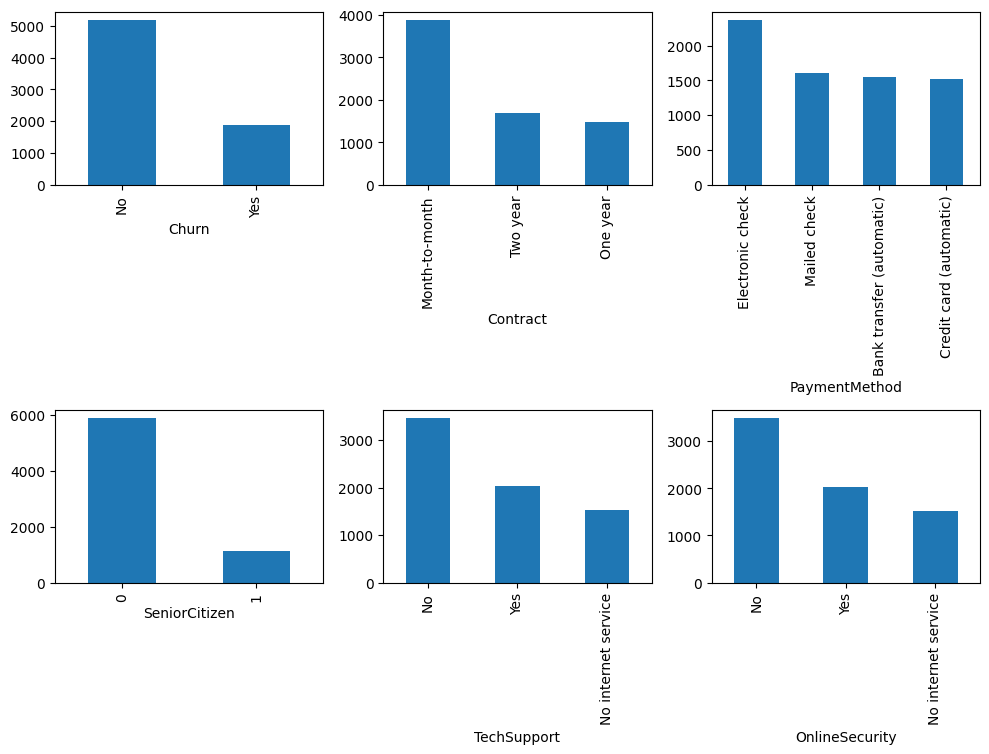

In [4]:
""" 

    finding realtionship between two columns and how they impact churn column
    plot the graph between two column to visualize inter relationship between the column

"""
figure = plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
df['Churn'].value_counts().plot(kind='bar')
plt.subplot(3,3,2)
df['Contract'].value_counts().plot(kind='bar')
plt.subplot(3,3,3)
df['PaymentMethod'].value_counts().plot(kind='bar')
plt.subplot(3,3,4)
df['SeniorCitizen'].value_counts().plot(kind='bar')
plt.subplot(3,3,5)
df['TechSupport'].value_counts().plot(kind='bar')
plt.subplot(3,3,6)
df['OnlineSecurity'].value_counts().plot(kind='bar')
plt.tight_layout()

In [18]:
df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,0,2,0,0,1,3,53.85,108.15,1
3,0,0,0,45,1,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,1,2,70.70,151.65,1


In [19]:
""" 
    preparing train and test data for model training.

"""
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=200)

In [25]:
"""  

    checking which algorithm works better on this dataset.

"""

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KDTree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import lightgbm
from lightgbm import LGBMClassifier

In [10]:
model_tree = RandomForestClassifier(criterion='log_loss',bootstrap=True)
model_tree.fit(x_train,y_train)
y_pred_tree = model_tree.predict(x_test)
print(f"Accuracy of RandomForestClassifier is {accuracy_score(y_test,y_pred_tree)}")

Accuracy of RandomForestClassifier is 0.7733080927591103


In [22]:
model_tree = GradientBoostingClassifier(loss='exponential',learning_rate=0.05,max_depth=6)
model_tree.fit(x_train,y_train)
y_pred_tree = model_tree.predict(x_test)
print(f"Accuracy of GradientBoostingClassifier  is {accuracy_score(y_test,y_pred_tree)}")

# Classification Report for XGB Model
print(classification_report(model_tree.predict(x_test),y_test))



Accuracy of GradientBoostingClassifier  is 0.7827733080927591
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1689
           1       0.47      0.65      0.54       424

    accuracy                           0.78      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.82      0.78      0.79      2113



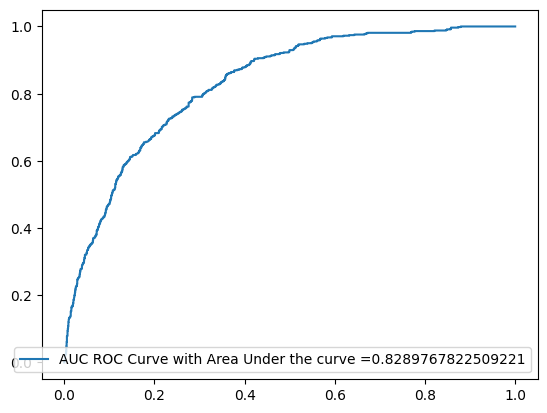

In [24]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass
generate_auc_roc_curve(model_tree, x_test)

In [ ]:

lgb_model = LGBMClassifier(num_leaves=15,learning_rate=0.01)
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(x, y)



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
models = [("LightGBM", lgbm_tuned),
          ("GB",model_tree)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_test, y_test, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


In [ ]:
warnings.filterwarnings("ignore", category=Warning, module="lightgbm")
for name, model in models:
        base = model.fit(x_train,y_train)
        y_pred = base.predict(x_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=x.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel("data points")
        plt.ylabel("contribution of each column in prediction.")
        plt.title(name)
        plt.show()

In [73]:
kernel = 5.0 * RBF(length_scale=3.0)
model_tree = GaussianProcessClassifier(kernel=kernel,random_state=100)
model_tree.fit(x_train,y_train)
y_pred_tree = model_tree.predict(x_test)
print(f"Accuracy of GaussianProcessClassifier  is {accuracy_score(y_test,y_pred_tree)}")

/home/endless/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:434: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Accuracy of GradientBoostingClassifier  is 0.7846663511594889


In [15]:
model_adaboost = AdaBoostClassifier(learning_rate=0.6,algorithm='SAMME')
model_adaboost.fit(x_train,y_train)
y_pred_adaboost = model_adaboost.predict(x_test)
print(f"Accuracy of AdaBoostClassifier  is {accuracy_score(y_test,y_pred_adaboost)}")

Accuracy of AdaBoostClassifier  is 0.780407004259347


In [25]:
model_svc = SVC(kernel='rbf',gamma=0.01)
model_svc.fit(x_train,y_train)
y_pred_svc = model_svc.predict(x_test)
print(f"Accuracy of SVC  is {accuracy_score(y_test,y_pred_svc)}")

Accuracy of SVC  is 0.7600567912920019


In [33]:
model_naive = GaussianNB()
model_naive.fit(x_train,y_train)
y_pred_naive = model_naive.predict(x_test)
print(f"Accuracy of GaussianNB  is {accuracy_score(y_test,y_pred_naive)}")

Accuracy of GaussianNB  is 0.7458589682915286


In [41]:
model_naive_multi = MultinomialNB()
model_naive_multi.fit(x_train,y_train)
y_pred_naive_multi = model_naive_multi.predict(x_test)
print(f"Accuracy of MultinomialNB  is {accuracy_score(y_test,y_pred_naive_multi)}")

Accuracy of MultinomialNB  is 0.6639848556554662


In [11]:
model_tree_svc = NuSVC(kernel='rbf',gamma=0.01)
model_tree_svc.fit(x_train,y_train)
y_pred_tree_svc = model_tree_svc.predict(x_test)
print(f"Accuracy of NuSVC  is {accuracy_score(y_test,y_pred_tree_svc)}")

Accuracy of NuSVC  is 0.7444391859914813
